In [1]:
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE201nnn/GSE201516/suppl/GSE201516%5FDataS1.csv.gz

--2024-04-24 09:30:43--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE201nnn/GSE201516/suppl/GSE201516%5FDataS1.csv.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.11
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48322614 (46M) [application/x-gzip]
Saving to: ‘GSE201516_DataS1.csv.gz’

GSE201516_DataS1.cs 100%[===================>]  46.08M   830KB/s    in 82s     

2024-04-24 09:32:06 (576 KB/s) - ‘GSE201516_DataS1.csv.gz’ saved [48322614/48322614]



In [3]:
import numpy as np
import pandas as pd

# plotting
import matplotlib
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('GSE201516_DataS1.csv.gz')

In [51]:
label_fs = 17
line_color = 'black'

def sub_make_plots(P,H,ax,
               axis_fs = 12,title_fs = 15,
               s = 2, alpha = 0.1,color='gray'):

  delta = P - H
  scaled_theta = (2/np.pi) * np.arctan( H / delta )
  R = np.sqrt( delta**2 + H**2)
  # get cis prop
  cis_prop_reordered = scaled_theta-0.5
  cis_prop_reordered[cis_prop_reordered<=-1.0] = (cis_prop_reordered[cis_prop_reordered<=-1.0]) + 2.0

  ax.scatter(cis_prop_reordered, P ,s = s, alpha = alpha,color=color)
  ax.set_ylabel('$X_{12}$',fontsize=18)
  ax.axhline(0, color='black', linewidth=2, alpha=0.7, linestyle='--')
  ax.tick_params(axis='both', labelsize=label_fs)
  ax.tick_params(bottom=False)
  ax.grid(which='both', alpha=0.5, linewidth=0.5)
  ax.minorticks_on()


# def make_plots(df,color_dict,title=None,
#                axis_fs = 12,title_fs = 15,
#                s = 2, alpha = 0.4,save_path=None):


#   fig, axs  = plt.subplots(1,2,figsize = (10,5) )


#   for r in color_dict.keys():
#     print(f'Working on {r} with color:')
#     df_ = df.loc[df['reg_group'] == r]
#     P = df_['P'].values.flatten()
#     H = df_['H'].values.flatten()


#     sub_make_plots(P,H,axs[0],
#                axis_fs = axis_fs,title_fs = title_fs,
#                s = s, alpha = alpha, color = color_dict[r])

#   cis_prop = df_['cisprop'].values.flatten()
#   scaled_theta_all = np.abs(df_['scaled_theta'].values.flatten())
#   ax = axs[1]
#   ax.scatter(cis_prop,scaled_theta_all, s = s, color = 'darkred')
#   ax.set_xlabel('Reported proportion $cis$',fontsize = 18)
#   ax.set_ylabel('Proportion $cis$',fontsize = 18)
# #   ax.grid(color='lightgray')
# #   ax.grid(which='minor', alpha=0.2)
# #   ax.grid(which='major', alpha=0.5)
# #   ax.grid(which='both', linewidth=0.5)
# #   ax.minorticks_on()
# #   ax.axhline(0, color='black', linewidth=2,alpha=0.7,linestyle='-')
# #   ax.axvline(0, color='black', linewidth=2,alpha=0.7,linestyle='-')
#   x_min, x_max = ax.get_xlim()
#   y_min, y_max = ax.get_ylim()
#   # Determine the diagonal points for the line y = x
#   diag_min = min(x_min, y_min)
#   diag_max = max(x_max, y_max)
#   ax.plot([0, diag_max], [0, diag_max], linewidth = 3.0, color='gray',alpha=0.7,linestyle='--',
#           label = 'y = x')
#   # ax.plot([-diag_min, -diag_max], [diag_min, diag_max], color='black',alpha=0.7,linestyle='--')
#   # Set x and y axis limits
#   ax.set_xlim(0, 1.02)
#   ax.set_ylim(0, 1.02)

#   ax.tick_params(axis='both',labelsize=label_fs)
#   ax.spines[['right', 'top']].set_visible(False)
#   plt.legend(fontsize=18)
#   plt.tight_layout()
#   if title:
#      axs[0].set_title(title,fontsize=title_fs)
#   if save_path:
#       plt.savefig(save_path,bbox_inches='tight',dpi=400)
#   plt.show();
    

## Newly calculated vs. reported proportion $cis$
Plot newly calculated proportion *cis* versus the reported proportion *cis* from Barr *et al.*

In [6]:
# calculate proportion cis

P = df['dream.logFC'].values.flatten()
H = df['hybrid.logFC'].values.flatten()


delta = P - H
scaled_theta = (2/np.pi) * np.arctan( H / delta )
R = np.sqrt( delta**2 + H**2)

df['P'] = P
df['H'] = H
df['R'] = R
df['scaled_theta'] = scaled_theta
df['cisprop_ours'] = np.abs(scaled_theta)



/var/folders/yr/5f4ybhp15cv9yg_9r00sy7880000gn/T/ipykernel_41161/2869720084.py:8: RuntimeWarning: divide by zero encountered in divide
  scaled_theta = (2/np.pi) * np.arctan( H / delta )


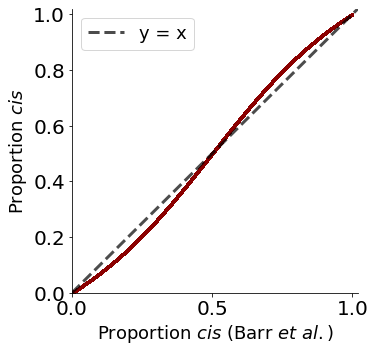

In [17]:
fig,ax = plt.subplots(1,1,figsize=(5.4,5))
cis_prop = df['cisprop'].values.flatten()
scaled_theta_all = np.abs(df['scaled_theta'].values.flatten())
ax.scatter(cis_prop,scaled_theta_all, s = 4, color = 'darkred')
ax.set_xlabel('Proportion $cis$ (Barr $et$ $al.)$',fontsize = 18)
ax.set_ylabel('Proportion $cis$',fontsize = 18)
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
# Determine the diagonal points for the line y = x
diag_min = min(x_min, y_min)
diag_max = max(x_max, y_max)
ax.plot([0, diag_max], [0, diag_max], linewidth = 3.0, color='black',alpha=0.7,linestyle='--',
      label = 'y = x')
# Set x and y axis limits
ax.set_xlim(0, 1.02)
ax.set_ylim(0, 1.02)

ax.tick_params(axis='both',labelsize=label_fs)
ax.spines[['right', 'top']].set_visible(False)
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig('./figs/fig3A',bbox_inches='tight',dpi=400)

## Variance and mean of proportion $cis$ across cell types

In [7]:
var_cis_prop_df =  pd.DataFrame(df.groupby(['gene'])['cisprop_ours'].apply(lambda g: g.var(skipna=False)))
mean_cis_prop_df = pd.DataFrame(df.groupby(['gene'])['cisprop_ours'].apply(lambda g: g.mean(skipna=False)))

# gene thresholds: make sure they are not ambiguous in at least 35/72 cell types
thresh = 0
df_reg = df
number_not_null = df_reg.groupby(['gene']).count()['cell.type']
genes_not_null = number_not_null[number_not_null>thresh].index

var_cis_prop_df = var_cis_prop_df.loc[genes_not_null,:].dropna()
mean_cis_prop_df = mean_cis_prop_df.loc[var_cis_prop_df.index,:]

In [8]:
cis_thresh = 0.11
high_var_df = var_cis_prop_df[var_cis_prop_df['cisprop_ours']>cis_thresh]


high_var_df['function'] = ['Mitochondrial ATP synthase',
                           'Biogenesis of lysosomal organelles',
                           'Polymerizes and depolymerizes actin',
                           'DNA methyltransferase 1',
                           'Melanoma-associated, cell cycle, apoptosis',
                           'Angiogensis in brain',
                           'Protease, colocates with DNA damage',
                           'Ribosomal protein',
                           'Ribosomal protein ',
                           'Ribosomal protein'
                          ]


/var/folders/yr/5f4ybhp15cv9yg_9r00sy7880000gn/T/ipykernel_41161/2093374525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_var_df['function'] = ['Mitochondrial ATP synthase',


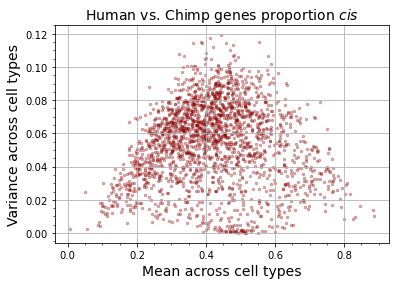

In [9]:
fs = 14
plt.scatter(mean_cis_prop_df.values,var_cis_prop_df.values,s=6,color='darkred',alpha=0.3)
plt.grid()
plt.minorticks_on()
plt.xlabel('Mean across cell types',fontsize=fs)
plt.ylabel('Variance across cell types',fontsize=fs)
plt.title('Human vs. Chimp genes proportion $cis$',fontsize=fs)
plt.savefig('./figs/barr_gene_var_vs_mean.png',dpi=400,bbox_inches='tight');

In [10]:
cis_thresh = 0.11
high_var_genes = var_cis_prop_df[var_cis_prop_df['cisprop_ours']>cis_thresh].index
high_var_genes

Index(['ATP5MF', 'BLOC1S1', 'CFL1', 'DNMT1', 'MAGEH1', 'PPIL4', 'PSMD6',
       'RPL21', 'RPS16', 'RPS5'],
      dtype='object', name='gene')

black
black
black
black


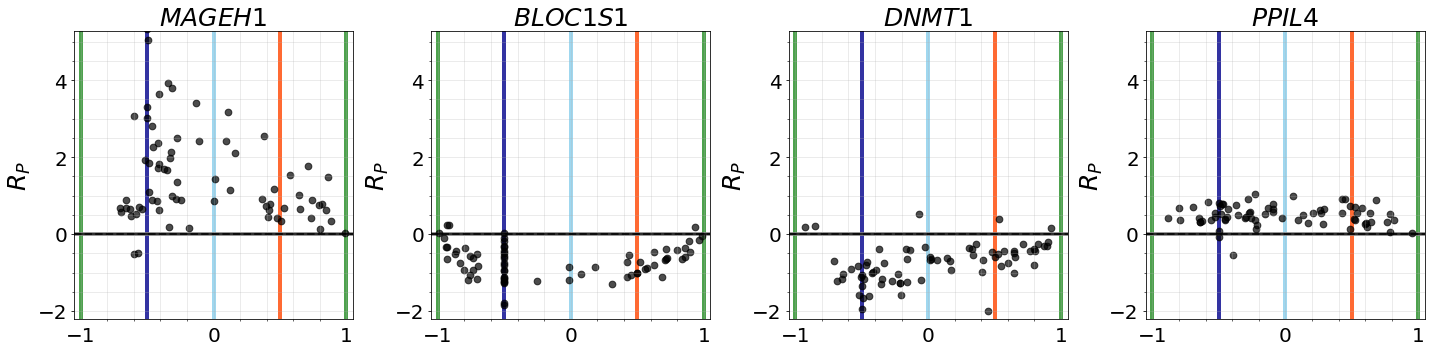

In [11]:
axis_fs = 25
title_fs = 25
label_fs = 20
s = 45
alpha = .7
line_color = 'black'
fig,ax = plt.subplots(1,4,figsize=(20,5))


axis_width = 4.0
line_alpha = 0.8

for i,gene in enumerate(['MAGEH1','BLOC1S1','DNMT1','PPIL4']):

  df_gene = df[df['gene'].isin([gene])]
  P = df_gene['P'].values.flatten()
  H = df_gene['H'].values.flatten()


  sub_make_plots(P,H,ax=ax[i],
               axis_fs = axis_fs,title_fs = title_fs,
               s = s, alpha = alpha, color = 'black')


  ax[i].set_ylabel('$R_P$',fontsize=axis_fs)
  ax[i].set_title(f'${gene}$',fontsize=title_fs)
    
  ax[i].set_ylim(-2.2,5.27)
  ax[i].set_xlim(-1.05,1.05)
  ax[i].tick_params(which='both',labelsize=label_fs)

  ax[i].axvline(0.5, color='orangered', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[i].axvline(-0.5, color='darkblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[i].axvline(0.0, color='skyblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[i].axvline(-1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[i].axvline(1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[i].axhline(0, color='gray', linewidth=axis_width, alpha = line_alpha,zorder=0)
  ax[i].axhline(0, color='black', linewidth=2, alpha=0.7, linestyle='-')

  ax[i].tick_params(axis='both', labelsize=label_fs)
  ax[i].tick_params(bottom=False)
  ax[i].grid(which='both', alpha=0.5, linewidth=0.5)
  ax[i].minorticks_on()

plt.tight_layout()
plt.savefig('./figs/barr_highvar_reg.png',dpi=400,bbox_inches='tight')


In [ ]:
# for celltype in df['cell.type'].unique():
#   eps = 1
#   df_ = df[df['cell.type'] == celltype]
#   P = df_['dream.logFC'].values.flatten()
#   H = np.log2( df_['hybrid.numi.human'].values.flatten() + eps) - np.log2( df_['hybrid.numi.chimp'].values.flatten() + eps)

#   cis_prop = df_['cisprop'].values.flatten()

#   make_plots(P,H,cis_prop,title=f'Human vs. Chimp {celltype}, eps = {eps}')

In [62]:
gene_colors = ['gold','plum','red','magenta']

/var/folders/yr/5f4ybhp15cv9yg_9r00sy7880000gn/T/ipykernel_41161/726465440.py:9: RuntimeWarning: divide by zero encountered in divide
  scaled_theta = (2/np.pi) * np.arctan( H / delta )


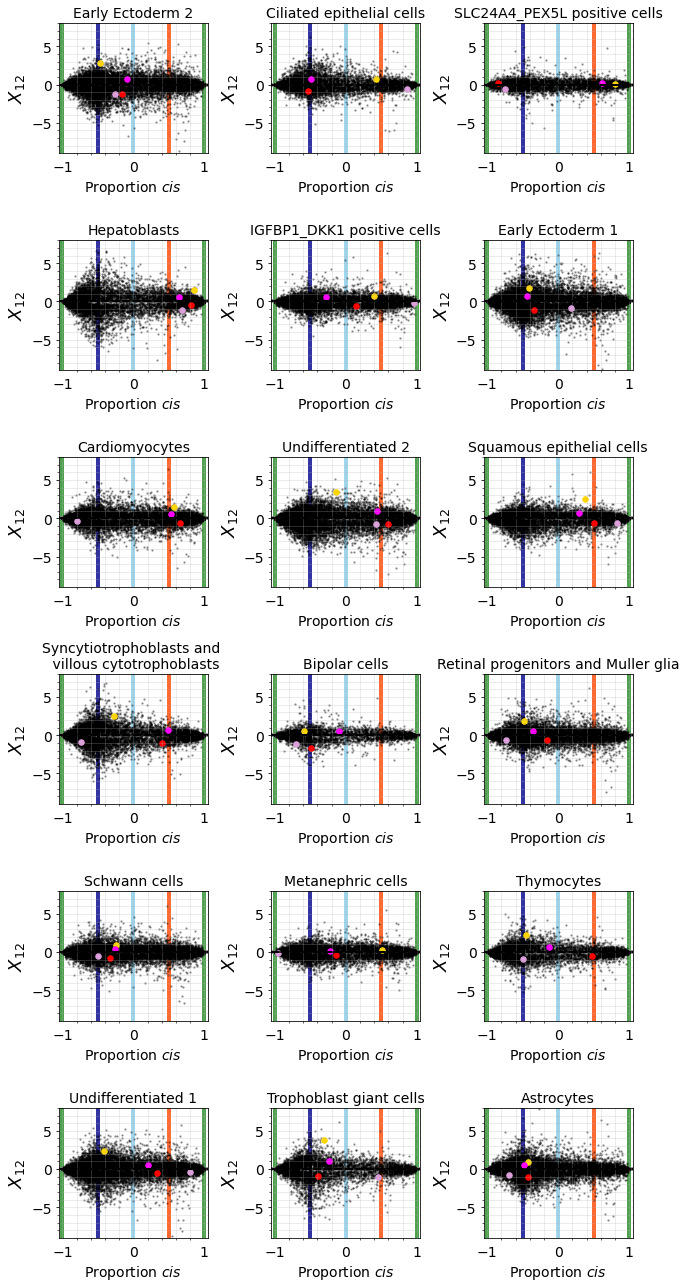

In [63]:

cell_types = df['cell.type'].unique()

n = 1

fig,ax = plt.subplots(6,3,figsize = (3*3,6*3) )
alpha = 0.3
s = 2.0
axis_fs = 14
title_fs = 14
label_fs = 14
for i,ct in enumerate(cell_types[:18]):
    
  ind1 = i%6
  ind2 = int( np.floor(i/6)) 
    
  df_gene = df[df['cell.type'].isin([ct])]
  P = df_gene['P'].values.flatten()
  H = df_gene['H'].values.flatten()


  sub_make_plots(P,H,ax=ax[ind1,ind2],
               axis_fs = axis_fs,title_fs = title_fs,
               s = s, alpha = alpha, color = 'black')

  
  ax[ind1,ind2].set_ylabel('$R_P$',fontsize=axis_fs)
  ax[ind1,ind2].set_xlabel('Proportion $cis$',fontsize=axis_fs)
  if ct == 'Syncytiotrophoblasts and villous cytotrophoblasts':
        ct = 'Syncytiotrophoblasts and \n villous cytotrophoblasts'
  ax[ind1,ind2].set_title(f'{ct}',fontsize=title_fs)
    
  ax[ind1,ind2].set_ylim(-9.0,8.0)
  ax[ind1,ind2].set_xlim(-1.05,1.05)
  ax[ind1,ind2].tick_params(which='both',labelsize=label_fs)

  ax[ind1,ind2].axvline(0.5, color='orangered', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(-0.5, color='darkblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(0.0, color='skyblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(-1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axhline(0, color='gray', linewidth=axis_width, alpha = line_alpha,zorder=0)
  ax[ind1,ind2].axhline(0, color='black', linewidth=2, alpha=0.7, linestyle='-')

  ax[ind1,ind2].tick_params(axis='both', labelsize=label_fs)
  ax[ind1,ind2].tick_params(bottom=False)
  ax[ind1,ind2].grid(which='both', alpha=0.5, linewidth=0.5)
  ax[ind1,ind2].minorticks_on()

    # add genes

  for g,gene in enumerate(['MAGEH1','BLOC1S1','DNMT1','PPIL4']):
      df_gene_ = df_gene[df_gene['gene'].isin([gene])]
      P = df_gene_['P'].values.flatten()
      H = df_gene_['H'].values.flatten()


      sub_make_plots(P,H,ax=ax[ind1,ind2],
                   axis_fs = axis_fs,title_fs = title_fs,
                   s = 30, alpha = 1.0, color = gene_colors[g],)
    
plt.tight_layout()
plt.savefig(f'./figs/barr_celltypes_{n}.png',dpi=400,bbox_inches='tight')




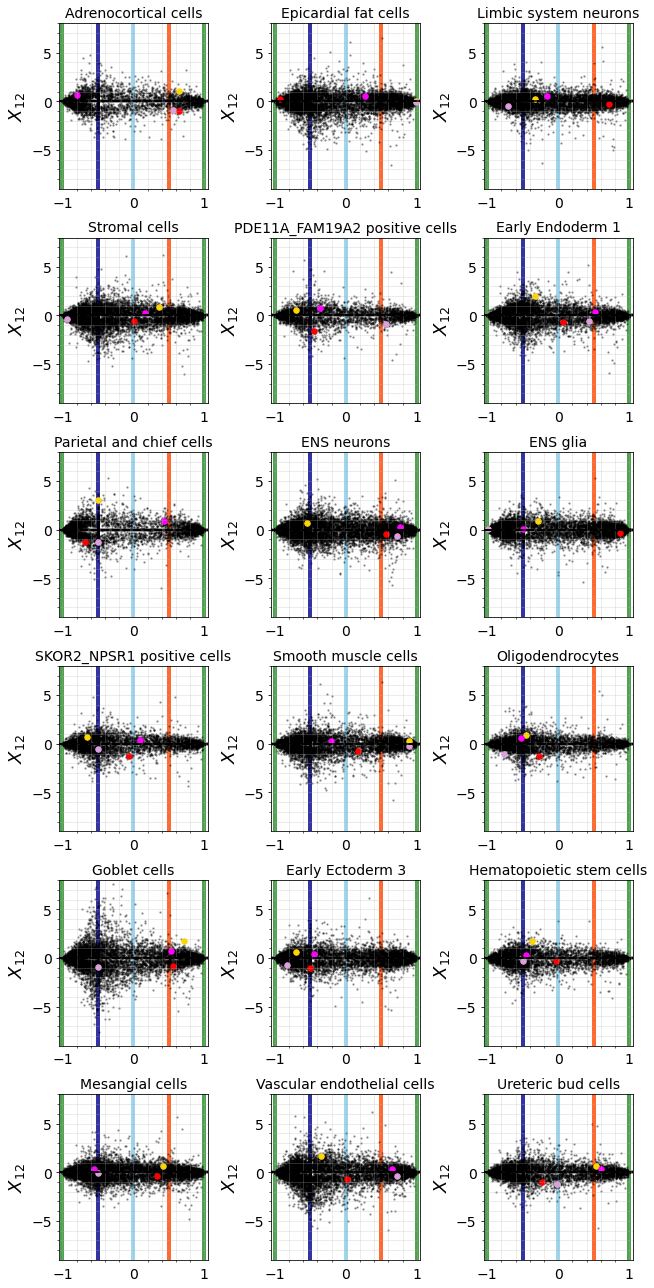

In [64]:
cell_types = df['cell.type'].unique()

n = 2
fig,ax = plt.subplots(6,3,figsize = (3*3,6*3) )
for i,ct in enumerate(cell_types[18:18*2]):
    
  ind1 = i%6
  ind2 = int( np.floor(i/6)) 
    
  df_gene = df[df['cell.type'].isin([ct])]
  P = df_gene['P'].values.flatten()
  H = df_gene['H'].values.flatten()


  sub_make_plots(P,H,ax=ax[ind1,ind2],
               axis_fs = axis_fs,title_fs = title_fs,
               s = s, alpha = alpha, color = 'black')

  
  ax[ind1,ind2].set_ylabel('$R_P$',fontsize=axis_fs)
  ax[ind1,ind2].set_ylabel('Proportion $cis$',fontsize=axis_fs)
  ax[ind1,ind2].set_title(f'{ct}',fontsize=title_fs)
    
  ax[ind1,ind2].set_ylim(-9.0,8.0)
  ax[ind1,ind2].set_xlim(-1.05,1.05)
  ax[ind1,ind2].tick_params(which='both',labelsize=label_fs)

  ax[ind1,ind2].axvline(0.5, color='orangered', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(-0.5, color='darkblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(0.0, color='skyblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(-1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axhline(0, color='gray', linewidth=axis_width, alpha = line_alpha,zorder=0)
  ax[ind1,ind2].axhline(0, color='black', linewidth=2, alpha=0.7, linestyle='-')

  ax[ind1,ind2].tick_params(axis='both', labelsize=label_fs)
  ax[ind1,ind2].tick_params(bottom=False)
  ax[ind1,ind2].grid(which='both', alpha=0.5, linewidth=0.5)
  ax[ind1,ind2].minorticks_on()

      # add genes

  for g,gene in enumerate(['MAGEH1','BLOC1S1','DNMT1','PPIL4']):
      df_gene_ = df_gene[df_gene['gene'].isin([gene])]
      P = df_gene_['P'].values.flatten()
      H = df_gene_['H'].values.flatten()


      sub_make_plots(P,H,ax=ax[ind1,ind2],
                   axis_fs = axis_fs,title_fs = title_fs,
                   s = 30, alpha = 1.0, color = gene_colors[g],)
plt.tight_layout()
plt.savefig(f'./figs/barr_celltypes_{n}.png',dpi=400,bbox_inches='tight');

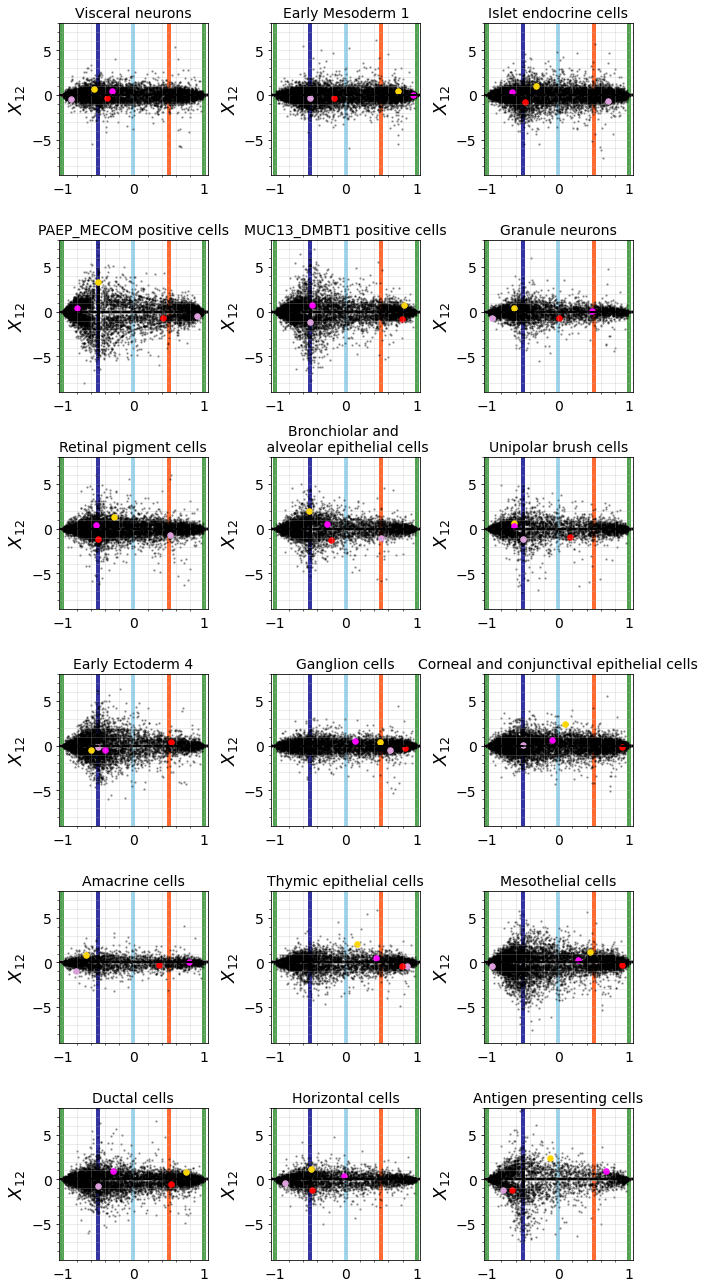

In [65]:


n = 3
fig,ax = plt.subplots(6,3,figsize = (3*3,6*3) )



for i,ct in enumerate(cell_types[18*2:18*3]):
    
  ind1 = i%6
  ind2 = int( np.floor(i/6)) 
    
  df_gene = df[df['cell.type'].isin([ct])]
  P = df_gene['P'].values.flatten()
  H = df_gene['H'].values.flatten()


  sub_make_plots(P,H,ax=ax[ind1,ind2],
               axis_fs = axis_fs,title_fs = title_fs,
               s = s, alpha = alpha, color = 'black')

  
  ax[ind1,ind2].set_ylabel('$R_P$',fontsize=axis_fs)
  ax[ind1,ind2].set_ylabel('Proportion $cis$',fontsize=axis_fs)
  if ct == 'Bronchiolar and alveolar epithelial cells':
        ct = 'Bronchiolar and \n alveolar epithelial cells'
  ax[ind1,ind2].set_title(f'{ct}',fontsize=title_fs)
    
  ax[ind1,ind2].set_ylim(-9.0,8.0)
  ax[ind1,ind2].set_xlim(-1.05,1.05)
  ax[ind1,ind2].tick_params(which='both',labelsize=label_fs)

  ax[ind1,ind2].axvline(0.5, color='orangered', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(-0.5, color='darkblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(0.0, color='skyblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(-1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axhline(0, color='gray', linewidth=axis_width, alpha = line_alpha,zorder=0)
  ax[ind1,ind2].axhline(0, color='black', linewidth=2, alpha=0.7, linestyle='-')

  ax[ind1,ind2].tick_params(axis='both', labelsize=label_fs)
  ax[ind1,ind2].tick_params(bottom=False)
  ax[ind1,ind2].grid(which='both', alpha=0.5, linewidth=0.5)
  ax[ind1,ind2].minorticks_on()
  
      # add genes

  for g,gene in enumerate(['MAGEH1','BLOC1S1','DNMT1','PPIL4']):
      df_gene_ = df_gene[df_gene['gene'].isin([gene])]
      P = df_gene_['P'].values.flatten()
      H = df_gene_['H'].values.flatten()


      sub_make_plots(P,H,ax=ax[ind1,ind2],
                   axis_fs = axis_fs,title_fs = title_fs,
                   s = 30, alpha = 1.0, color = gene_colors[g],)

plt.tight_layout()
plt.savefig(f'./figs/barr_celltypes_{n}.png',dpi=400,bbox_inches='tight')

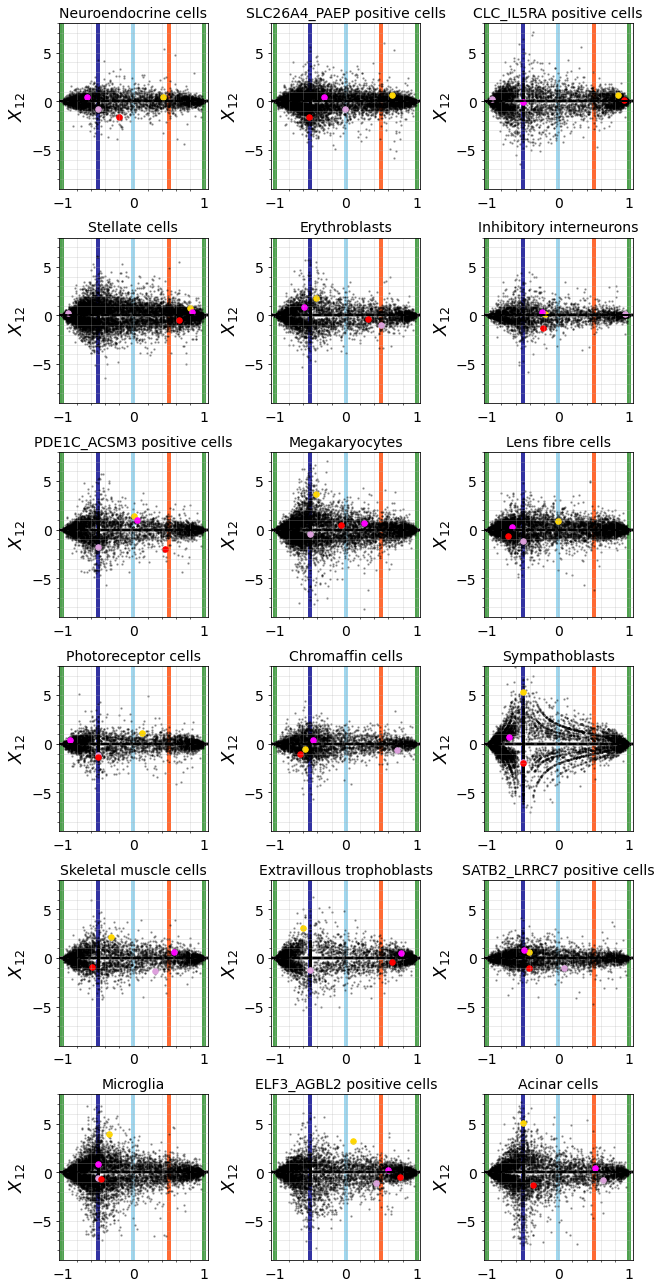

In [66]:


n = 4
fig,ax = plt.subplots(6,3,figsize = (3*3,6*3) )
for i,ct in enumerate(cell_types[18*3:]):
    
  ind1 = i%6
  ind2 = int( np.floor(i/6)) 
    
  df_gene = df[df['cell.type'].isin([ct])]
  P = df_gene['P'].values.flatten()
  H = df_gene['H'].values.flatten()


  sub_make_plots(P,H,ax=ax[ind1,ind2],
               axis_fs = axis_fs,title_fs = title_fs,
               s = s, alpha = alpha, color = 'black')

  
  ax[ind1,ind2].set_ylabel('$R_P$',fontsize=axis_fs)
  ax[ind1,ind2].set_ylabel('Proportion $cis$',fontsize=axis_fs)
  ax[ind1,ind2].set_title(f'{ct}',fontsize=title_fs)
    
  ax[ind1,ind2].set_ylim(-9.0,8.0)
  ax[ind1,ind2].set_xlim(-1.05,1.05)
  ax[ind1,ind2].tick_params(which='both',labelsize=label_fs)

  ax[ind1,ind2].axvline(0.5, color='orangered', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(-0.5, color='darkblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(0.0, color='skyblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(-1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axvline(1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
  ax[ind1,ind2].axhline(0, color='gray', linewidth=axis_width, alpha = line_alpha,zorder=0)
  ax[ind1,ind2].axhline(0, color='black', linewidth=2, alpha=0.7, linestyle='-')

  ax[ind1,ind2].tick_params(axis='both', labelsize=label_fs)
  ax[ind1,ind2].tick_params(bottom=False)
  ax[ind1,ind2].grid(which='both', alpha=0.5, linewidth=0.5)
  ax[ind1,ind2].minorticks_on()
  
      # add genes

  for g,gene in enumerate(['MAGEH1','BLOC1S1','DNMT1','PPIL4']):
      df_gene_ = df_gene[df_gene['gene'].isin([gene])]
      P = df_gene_['P'].values.flatten()
      H = df_gene_['H'].values.flatten()


      sub_make_plots(P,H,ax=ax[ind1,ind2],
                   axis_fs = axis_fs,title_fs = title_fs,
                   s = 30, alpha = 1.0, color = gene_colors[g],)

plt.tight_layout()
plt.savefig(f'./figs/barr_celltypes_{n}.png',dpi=400,bbox_inches='tight')